<font size = 6>台灣本島各縣市平均懸浮微粒PM2.5監測資料</font>

In [1]:
import geopandas as gpd
import pandas as pd
from matplotlib import pyplot as plt
plt.rcParams['font.sans-serif']=['Noto Sans TC']
plt.rcParams['axes.unicode_minus']=False

<font size = 4>透過政府資料開放平臺(data.gov.tw/)取得每小時個縣市座標地圖 並輸入到Geopandas</font>

In [2]:
twmp_origin = gpd.read_file('tw_mapdata/TOWN_MOI_1100415.shp', encoding = "utf-8" )

In [3]:
twmp_origin

,TOWNID,TOWNCODE,COUNTYNAME,TOWNNAME,TOWNENG,COUNTYID,COUNTYCODE,geometry
0,V02,10014020,臺東縣,成功鎮,Chenggong Township,V,10014,"POLYGON ((121.40982 23.21369, 121.40984 23.213..."
1,T21,10013210,屏東縣,佳冬鄉,Jiadong Township,T,10013,"POLYGON ((120.54846 22.46067, 120.54853 22.460..."
2,P13,10009130,雲林縣,麥寮鄉,Mailiao Township,P,10009,"POLYGON ((120.30198 23.81625, 120.30197 23.815..."
3,V11,10014110,臺東縣,綠島鄉,Ludao Township,V,10014,"MULTIPOLYGON (((121.49155 22.67746, 121.49185 ..."
4,V16,10014160,臺東縣,蘭嶼鄉,Lanyu Township,V,10014,"MULTIPOLYGON (((121.61180 21.94290, 121.61133 ..."
...,...,...,...,...,...,...,...,...
363,B27,66000270,臺中市,太平區,Taiping District,B,66000,"POLYGON ((120.80263 24.16947, 120.80258 24.169..."
364,U12,10015120,花蓮縣,萬榮鄉,Wanrong Township,U,10015,"POLYGON ((121.27481 23.92640, 121.27521 23.926..."
365,U07,10015020,花蓮縣,鳳林鎮,Fenglin Township,U,10015,"POLYGON ((121.52611 23.81732, 121.52628 23.817..."
366,H10,68000100,桃園市,平鎮區,Pingzhen District,H,68000,"POLYGON ((121.19051 24.97123, 121.19058 24.971..."


<AxesSubplot:>

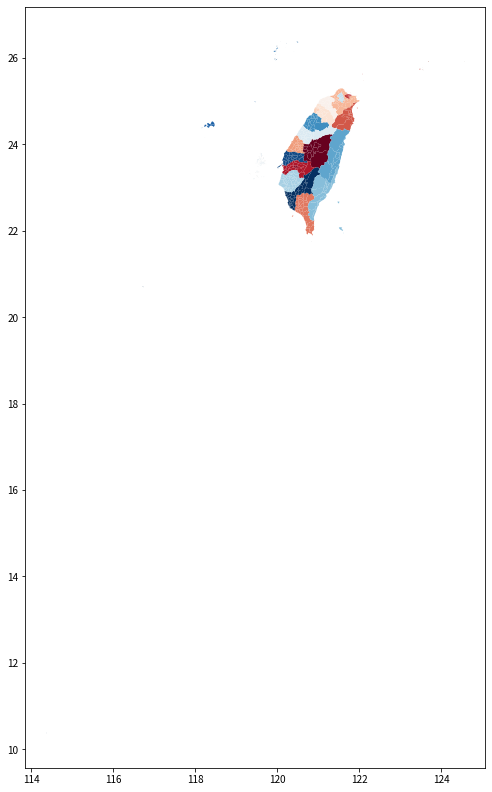

In [4]:
twmp_origin.plot(cmap='RdBu', column = 'COUNTYNAME', figsize = (14,14))

<font size = 4>透過.shp資料可以得知：因為東沙群島的關係，所以造成以上地圖不利閱讀，只能暫時將東沙群島的座標移除</font>

<AxesSubplot:>

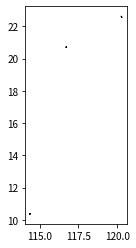

In [5]:
#東沙群島
pratas_island_shp=twmp_origin[twmp_origin['TOWNNAME']=='旗津區']
pratas_island_shp.plot(cmap='RdBu', edgecolor = 'black')

In [6]:
twmp= twmp_origin.drop(twmp_origin.index[twmp_origin['TOWNNAME']=='旗津區'])

<font size = 4>整理結果</font>

<AxesSubplot:>

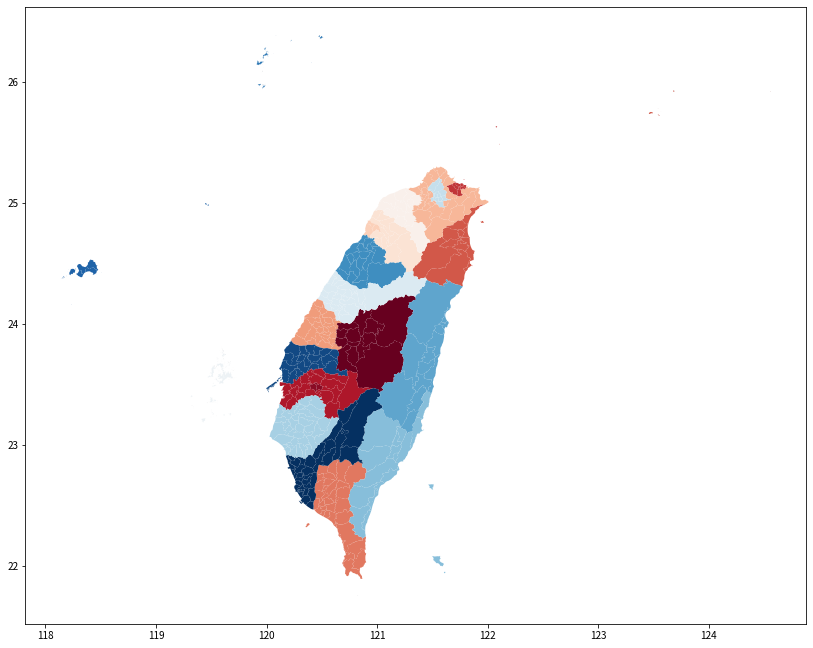

In [7]:
twmp.plot(cmap='RdBu', column = 'COUNTYNAME', figsize = (14,14))

##

<font size = 4>透過政府資料開放平臺(data.gov.tw/)取得第一手資訊，擷取目標資訊並整理合併 </font>

In [8]:
df = pd.read_csv('https://data.epa.gov.tw/api/v2/aqx_p_02?api_key=e8dd42e6-9b8b-43f8-991e-b3dee723a52d&limit=1000&sort=datacreationdate%20desc&format=csv')

In [9]:
df['datacreationdate'] = pd.to_datetime(df['datacreationdate'], format = '%Y-%m-%d %H:%M')
county_df = df.groupby(['county'])
county_pm_df = county_df['pm25'].mean().round(2)
county_pm_df = pd.DataFrame(county_pm_df)
county_pm_df

,pm25
county,
南投縣,29.33
嘉義市,16.00
嘉義縣,26.00
基隆市,35.00
宜蘭縣,27.50
屏東縣,21.33
彰化縣,28.75
新北市,28.67
新竹市,33.00


<font size = 5>最終資訊視覺化</font>

In [10]:
demo = twmp.merge(county_pm_df, left_on = 'COUNTYNAME', right_on = 'county')

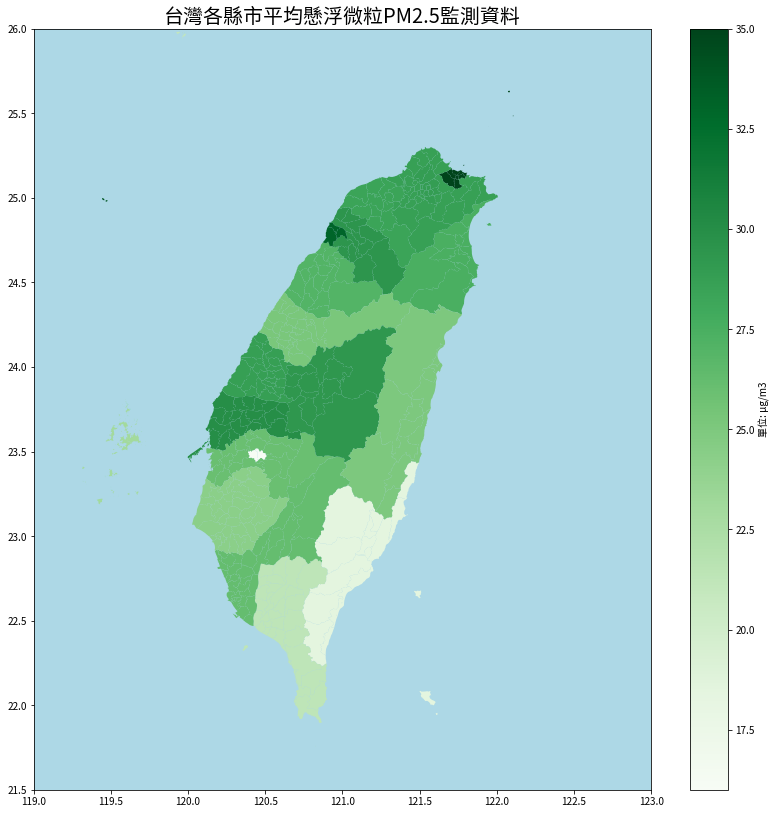

In [11]:
ax = demo.plot(column = 'pm25', cmap = 'Greens', alpha = 1, legend = True, legend_kwds = {'label': '單位: μg/m3'}, figsize = (14,14))
ax.set_ylim((21.5, 26))
ax.set_xlim((119, 123))
ax.set_title('台灣各縣市平均懸浮微粒PM2.5監測資料', fontsize = 20)

ax.set_facecolor("lightblue")